In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#dropping id
df = df.iloc[:,1:]

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [8]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

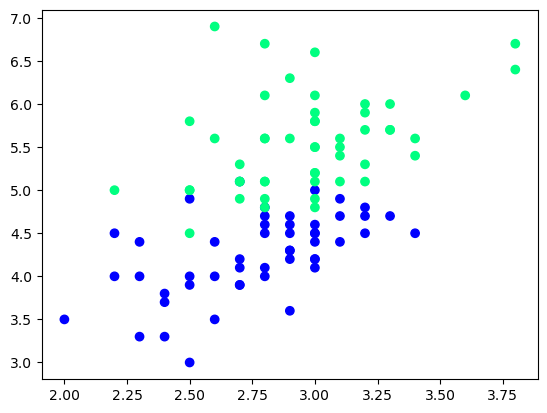

In [10]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [11]:
#randomly dividing the sample
df.sample(100)

,SepalWidthCm,PetalLengthCm,Species
69,2.5,3.9,1
102,3.0,5.9,2
125,3.2,6.0,2
83,2.7,5.1,1
141,3.1,5.1,2
...,...,...,...
57,2.4,3.3,1
65,3.1,4.4,1
132,2.8,5.6,2
118,2.6,6.9,2


In [12]:
df=df.sample(100)
df_train=df.iloc[:60,:].sample(10)#pehele 60 rows mai se 10 random rows out
df_val=df.iloc[60:80,:].sample(5)
df_test=df.iloc[80:,:].sample(5)


In [13]:
df_train

,SepalWidthCm,PetalLengthCm,Species
120,3.2,5.7,2
67,2.7,4.1,1
64,2.9,3.6,1
128,2.8,5.6,2
91,3.0,4.6,1
126,2.8,4.8,2
109,3.6,6.1,2
102,3.0,5.9,2
95,3.0,4.2,1
76,2.8,4.8,1


In [14]:
df_val

,SepalWidthCm,PetalLengthCm,Species
112,3.0,5.5,2
74,2.9,4.3,1
68,2.2,4.5,1
141,3.1,5.1,2
94,2.7,4.2,1


In [15]:
df_test

,SepalWidthCm,PetalLengthCm,Species
104,3.0,5.8,2
133,2.8,5.1,2
122,2.8,6.7,2
137,3.1,5.5,2
53,2.3,4.0,1


In [16]:
X_test=df_val.iloc[:,0:2].values
y_test=df_val.iloc[:,-1].values

In [17]:
X_test

array([[3. , 5.5],
       [2.9, 4.3],
       [2.2, 4.5],
       [3.1, 5.1],
       [2.7, 4.2]])

In [18]:
y_test

array([2, 1, 1, 2, 1])

BAGGING

**DATA FOR TREE ONE**

In [19]:
df_bag=df_train.sample(8,replace=True)

X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
109,3.6,6.1,2
76,2.8,4.8,1
102,3.0,5.9,2
128,2.8,5.6,2
109,3.6,6.1,2
67,2.7,4.1,1
95,3.0,4.2,1
64,2.9,3.6,1


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [21]:
dt_bag1 = DecisionTreeClassifier()

In [22]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)#flowChart
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

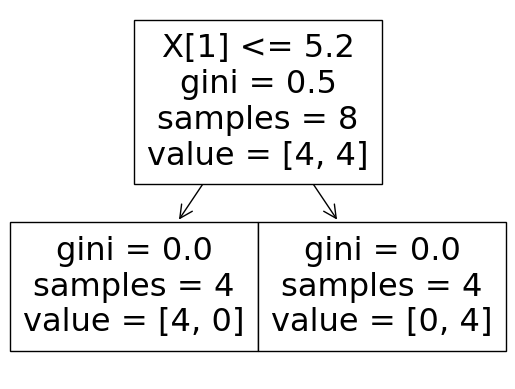

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.8


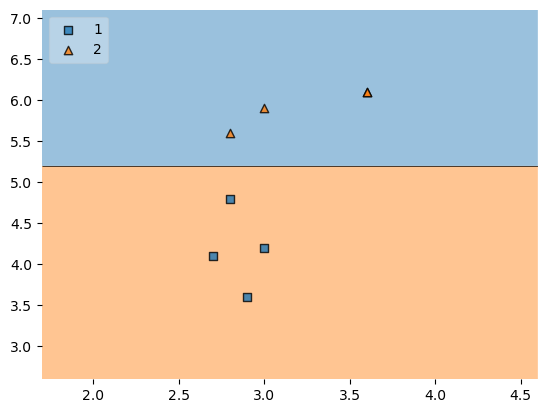

In [23]:
evaluate(dt_bag1,X,y )

**DATA FOR NEXT TREE**

In [24]:
df_bag=df_train.sample(8,replace=True)

X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
95,3.0,4.2,1
120,3.2,5.7,2
120,3.2,5.7,2
126,2.8,4.8,2
102,3.0,5.9,2
91,3.0,4.6,1
126,2.8,4.8,2
102,3.0,5.9,2


In [25]:
dt_bag2 = DecisionTreeClassifier()

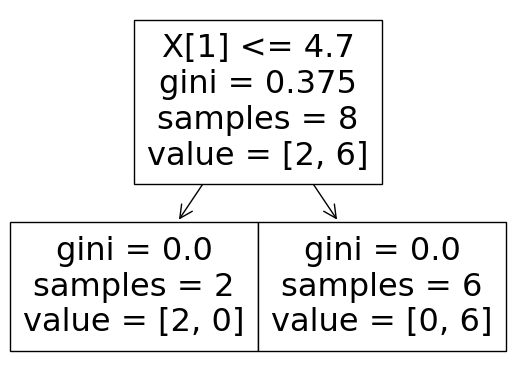

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


1.0


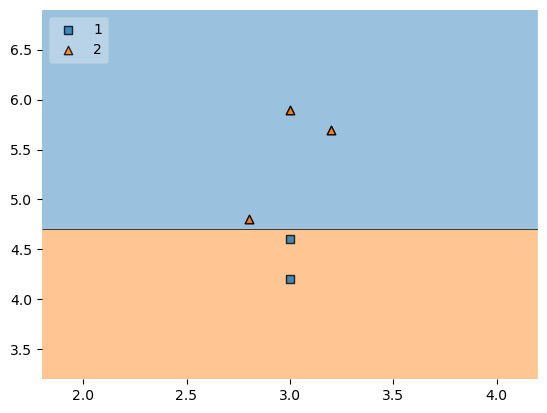

In [26]:
evaluate(dt_bag2,X,y )

**DATA FOR TREE 3**

In [27]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)#flowChart
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

In [28]:
dt_bag3 = DecisionTreeClassifier()

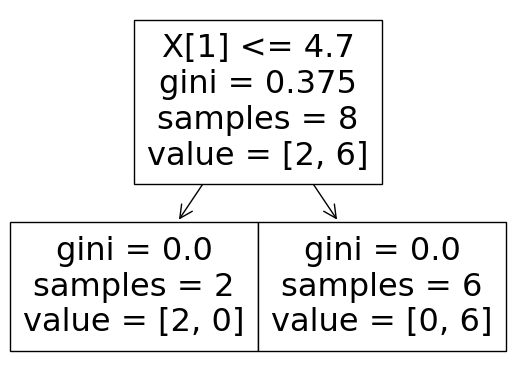

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


1.0


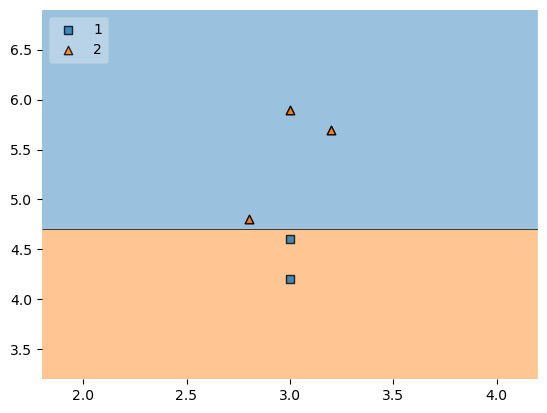

In [29]:
evaluate(dt_bag3,X,y )

**PREDICTION/AGGRATIONAPRT**

In [30]:
df_test

,SepalWidthCm,PetalLengthCm,Species
104,3.0,5.8,2
133,2.8,5.1,2
122,2.8,6.7,2
137,3.1,5.5,2
53,2.3,4.0,1


down below we are trying to figure out the the answer by giving individual input to
all the decision tree

In [31]:
print("Predictor 1",dt_bag1.predict(np.array([2.9,5.6]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.9,5.6]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.9,5.6]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [32]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [2]
Predictor 3 [2]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


**PASTING -->HERE ALSO WE DO ROW SAMPLING BUT WITHOUT REPLACEMENT**

**RANDOM SUBSPACES-->WE DO COLUMN SAMPLING**

In [33]:
df1 = pd.read_csv('/kaggle/input/iris/Iris.csv')
df1 = df1.sample(10)

In [34]:
df1.sample(2,replace=True,axis=1)#ASIX 1 SAY TO SAMPLING IN ROW

,PetalLengthCm,PetalWidthCm
108,5.8,1.8
53,4.0,1.3
35,1.2,0.2
84,4.5,1.5
33,1.4,0.2
123,4.9,1.8
138,4.8,1.8
145,5.2,2.3
23,1.7,0.5
107,6.3,1.8


**RANDOM PATHCHES-->ROW SAMPLING AND COLUMN SAMPLING**

In [35]:
#first row than column slection 
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,Species,Species
107,Iris-virginica,Iris-virginica
53,Iris-versicolor,Iris-versicolor
53,Iris-versicolor,Iris-versicolor
53,Iris-versicolor,Iris-versicolor
84,Iris-versicolor,Iris-versicolor
33,Iris-setosa,Iris-setosa
35,Iris-setosa,Iris-setosa
53,Iris-versicolor,Iris-versicolor
